# Scoring products of Digikala

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
digikala = pd.read_csv('new_digikala_comments.csv',  )
digikala.head()

,Unnamed: 0,rate,recommendation_status,is_buyer,product_id,advantages,disadvantages,likes,dislikes,seller_title,true_to_size_rate,have_title,body_length
0,0,1.0,not_recommended,True,252058,NaN,NaN,0,0,دیجی‌کالا,NaN,True,3
1,1,0.0,recommended,True,252058,['تجربه جالبی بود برام '],['بسته بندی جالبی نداشت'],1,0,دیجی‌کالا,NaN,True,10
2,2,0.0,recommended,True,3331597,NaN,NaN,0,0,آرالیا بیوتی,NaN,True,19
3,3,0.0,recommended,True,3331329,NaN,NaN,0,0,اینجاست آ,NaN,True,18
4,4,3.0,recommended,True,3255700,NaN,NaN,0,0,گالری آرایشی به سیما,NaN,True,19


In [11]:
digikala.describe()

,Unnamed: 0,rate,product_id,likes,dislikes,body_length
count,6.156289e+06,6.156289e+06,6.156289e+06,6.156289e+06,6.156289e+06,6.156289e+06
mean,3.078144e+06,3.648286e+00,3.908983e+06,4.503171e-01,8.687068e-02,1.008617e+01
std,1.777168e+06,1.861854e+00,3.015881e+06,2.294114e+00,8.313516e-01,1.336540e+01
min,0.000000e+00,0.000000e+00,7.602000e+03,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.539072e+06,3.000000e+00,1.532375e+06,0.000000e+00,0.000000e+00,3.000000e+00
50%,3.078144e+06,4.000000e+00,3.183184e+06,0.000000e+00,0.000000e+00,6.000000e+00
75%,4.617216e+06,5.000000e+00,5.992988e+06,0.000000e+00,0.000000e+00,1.200000e+01
max,6.156288e+06,2.500000e+03,1.270221e+07,1.136000e+03,3.360000e+02,9.080000e+02


## Comments Length Analyis
I want to declare Intervals for scoring on comments lenrgth. here is three method :
1. Heuristic-Based
2. Percentile-Based
3. Clustering-Based

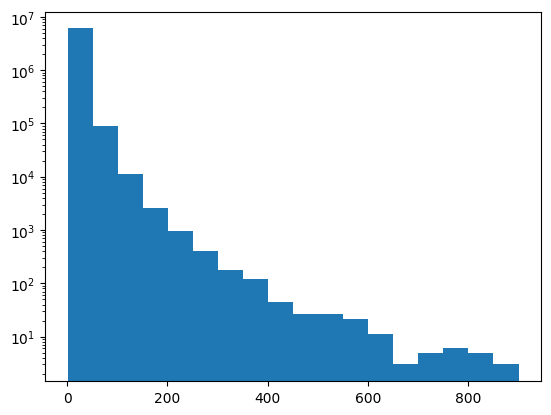

In [81]:
comments = digikala['body_length']
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
plt.show()

In [53]:
import bisect
from collections import defaultdict
def assign_score(intervals, lengths):
    sum = 0
    lengths_dict = defaultdict(list)
    for length in lengths:
        score = bisect.bisect_left(intervals, length)
        sum += score
        lengths_dict[score].append(length)

    lengths_stats = {}
    for score, lengths in lengths_dict.items():
        lengths_stats[score] = {
            'num' : len(lengths),
            'mean': np.mean(lengths),
            'std': np.std(lengths),
            'sum' : np.sum(lengths)
        }
    return lengths_stats, sum

In [54]:
# check function
intervals = [0, 1, 5, 10]
lengths = [0,0,1,2,2,3,6,4,6,20,23,43]

lengths_stats, sum = assign_score(intervals, lengths)
print(lengths_stats)
print(sum)

{0: {'num': 2, 'mean': 0.0, 'std': 0.0, 'sum': 0}, 1: {'num': 1, 'mean': 1.0, 'std': 0.0, 'sum': 1}, 2: {'num': 4, 'mean': 2.75, 'std': 0.82915619758885, 'sum': 11}, 3: {'num': 2, 'mean': 6.0, 'std': 0.0, 'sum': 12}, 4: {'num': 3, 'mean': 28.666666666666668, 'std': 10.208928554075703, 'sum': 86}}
27


### Heuristic-Based

In [67]:
# heuristic_intervals = [0, 5, 20, 100, 300]
heuristic_intervals = [1, 5, 20, 100, 300, 500, 1000]

lengths_stats, sum = assign_score(heuristic_intervals, comments)
print(lengths_stats)

{1: {'num': 2396414, 'mean': 3.4737036255004354, 'std': 1.0796489346353257, 'sum': 8324432}, 2: {'num': 2604942, 'mean': 10.50286954565591, 'std': 3.9701935666193893, 'sum': 27359366}, 0: {'num': 454430, 'mean': 1.0, 'std': 0.0, 'sum': 454430}, 3: {'num': 684946, 'mean': 34.560463160599525, 'std': 14.791842770940068, 'sum': 23672051}, 4: {'num': 15102, 'mean': 138.86611044894715, 'std': 39.72096362568075, 'sum': 2097156}, 5: {'num': 373, 'mean': 361.8552278820375, 'std': 46.523198465469385, 'sum': 134972}, 6: {'num': 82, 'mean': 621.9634146341464, 'std': 111.95060377640333, 'sum': 51001}}


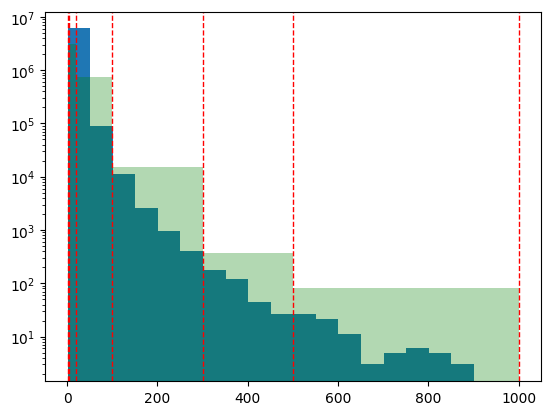

In [75]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in heuristic_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= heuristic_intervals, log = True, color= 'green', alpha = 0.3)
plt.show()

### Percentile-Based

In [80]:
percentiles = [10, 25, 50, 75, 90]
percentile_intervals = np.percentile(comments, percentiles)
np.insert(percentile_intervals, 0, 0)
np.append(percentile_intervals, 1000)
print(percentile_intervals)

lengths_stats, sum = assign_score(percentile_intervals, comments)
print(lengths_stats)

[ 2.  3.  6. 12. 22.]
{1: {'num': 653009, 'mean': 3.0, 'std': 0.0, 'sum': 1959027}, 3: {'num': 1436437, 'mean': 9.042898505120656, 'std': 1.6753956240569385, 'sum': 12989554}, 4: {'num': 847841, 'mean': 16.57415836224009, 'std': 2.7973192512167606, 'sum': 14052251}, 0: {'num': 1023154, 'mean': 1.555853761994773, 'std': 0.4968705639007318, 'sum': 1591878}, 2: {'num': 1599139, 'mean': 4.861806884829899, 'std': 0.8061972129332668, 'sum': 7774705}, 5: {'num': 596709, 'mean': 39.76141301706527, 'std': 25.04036208569286, 'sum': 23725993}}


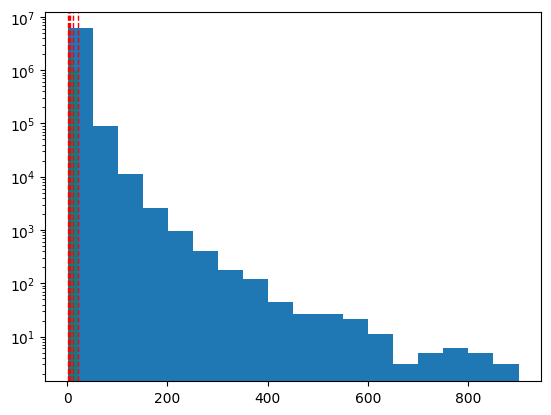

In [79]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in percentile_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= percentile_intervals, log = True, color= 'green', alpha = 0.3)
plt.show()

### Clustering-Based

In [86]:
n_intervals = 6
comment_lengths_reshaped = np.reshape(comments, (-1, 1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_intervals, random_state=42).fit(comment_lengths_reshaped)
clustering_intervals = np.sort(kmeans.cluster_centers_.flatten())
clustering_intervals = np.insert(clustering_intervals, 0, 0)
clustering_intervals = np.append(clustering_intervals, 1000)
print(clustering_intervals)

lengths_stats, sum = assign_score(clustering_intervals, comments)
print(lengths_stats)

[   0.            3.07939052    8.66824866   19.10930068   38.47635609
   79.34904769  200.47035992 1000.        ]
{1: {'num': 1676163, 'mean': 2.1184723681408073, 'std': 0.8041536967307585, 'sum': 3550905}, 3: {'num': 1482127, 'mean': 12.719323647703604, 'std': 3.03677149477343, 'sum': 18851653}, 2: {'num': 2237389, 'mean': 5.601855555739301, 'std': 1.381124644080117, 'sum': 12533530}, 4: {'num': 559466, 'mean': 26.439683555390317, 'std': 5.154853961995424, 'sum': 14792104}, 5: {'num': 170582, 'mean': 51.32073137845728, 'std': 10.489537022349868, 'sum': 8754393}, 6: {'num': 28730, 'mean': 107.85663069961713, 'std': 26.778852526446986, 'sum': 3098721}, 7: {'num': 1832, 'mean': 279.5316593886463, 'std': 97.70148301693946, 'sum': 512102}}


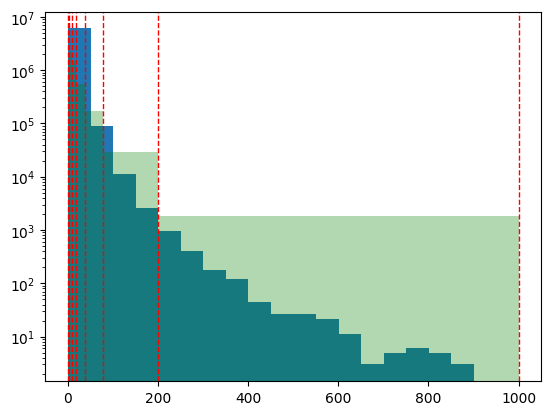

In [89]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in clustering_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= clustering_intervals, log = True, color= 'green', alpha = 0.3)
plt.show()

## Define Scoring Function

In [91]:
def score(group):
    _, comments = assign_score(clustering_intervals, group['body_length'])
    comments_score = comments / 1000
    rates_score = np.sum(group['rate']) / 5
    titles_score = np.sum(group['have_title'])
    likes_score = np.sum(group['likes']) + np.sum(group['dislikes'])

    return comments_score + rates_score + titles_score + likes_score

df = digikala.groupby(['product_id', 'seller_title']).apply(score).reset_index(name='score')
df.head()

C:\Users\Almas\AppData\Local\Temp\ipykernel_33524\969402756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = digikala.groupby(['product_id', 'seller_title']).apply(score).reset_index(name='score')


,product_id,seller_title,score
0,7602,برزان,63.966
1,7602,برهان الکترونیک,1.602
2,7602,به روز سنتر,3.007
3,7602,جانبی انسی,20.824
4,7602,جانبی حبیب,2.001


In [93]:
df.to_csv('example.csv', encoding='utf-8')